In [36]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers
#from elastic_export import AssetsExporter

import numpy as np
import os
import pandas as pd
import time
import logging
import json
from pythonjsonlogger import jsonlogger
import certifi


from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.cluster import KMeans  
np.set_printoptions(suppress=True)
import seaborn as sns

In [37]:
genreViewing = pd.read_pickle("genreViewing.pck")
genreViewing.head()
df = genreViewing
df = df.drop(columns=['Nyheter', 'Sport'])
df.head()
print(df.shape)

(36685, 5)


In [46]:
df = df.div(df.sum(axis=1), axis=0)
df = df.dropna()
print(df.shape)
df.head()

(36508, 7)


Fakta     Humor  Junior    Serier  \
00025077-6a1c-33ae-a148-c381d8884959    0.0  0.000000     0.0  0.290705   
0002eec9-d1ec-3ee8-aa40-dd537c6a8885    0.0  0.000000     0.0  0.000000   
000332c2-2707-3164-a339-955c32ef1a6b    0.0  0.000000     0.0  0.333333   
0003da9f-4aa4-3017-ad91-80aed675da9e    0.0  0.023566     0.0  0.289141   
00046792-2136-3850-8929-f31ac7c9e0d8    0.0  0.000000     0.0  0.103591   

                                      Underholdning   cluster  clusters  
00025077-6a1c-33ae-a148-c381d8884959       0.042629  0.333333  0.333333  
0002eec9-d1ec-3ee8-aa40-dd537c6a8885       0.142857  0.285714  0.571429  
000332c2-2707-3164-a339-955c32ef1a6b       0.000000  0.333333  0.333333  
0003da9f-4aa4-3017-ad91-80aed675da9e       0.020626  0.333333  0.333333  
00046792-2136-3850-8929-f31ac7c9e0d8       0.039267  0.142857  0.714286

In [39]:
df = df.div(df.sum(axis=1), axis=0)
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 36508 entries, 00025077-6a1c-33ae-a148-c381d8884959 to fffc861d-1c23-398f-aaf3-4b11a203341c
Data columns (total 5 columns):
Fakta            36508 non-null float64
Humor            36508 non-null float64
Junior           36508 non-null float64
Serier           36508 non-null float64
Underholdning    36508 non-null float64
dtypes: float64(5)
memory usage: 1.7+ MB
(36508, 5)


In [40]:
X = df.values
X[(np.isnan(X))]
np.nansum(X)
X = X[~np.isnan(X).any(axis=1)]
X
X.shape

(36508, 5)

In [41]:
k = 5

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

print(kmeans.labels_)
print(kmeans.labels_.shape)
print(df.shape)
df['cluster'] = kmeans.labels_
n = np.size(X,0)

[1 2 1 ... 0 1 2]
(36508,)
(36508, 5)


n profiles:  36508


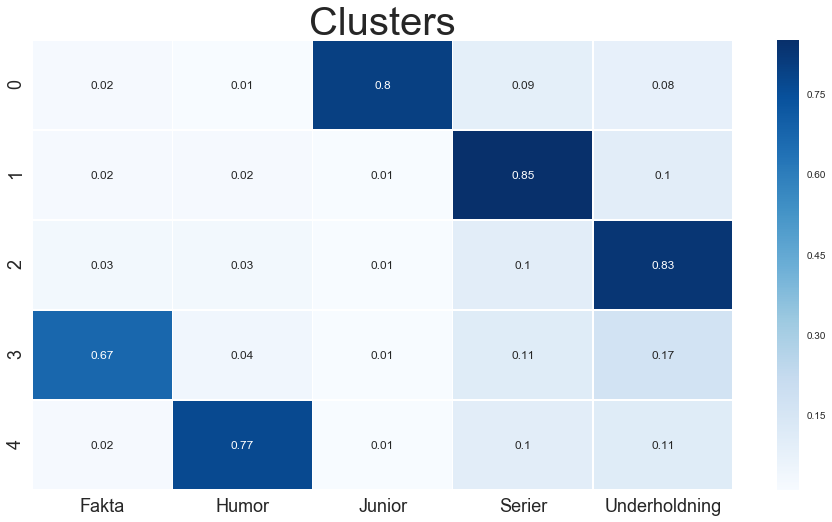

In [42]:
a = kmeans.cluster_centers_.round(decimals=2)
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.heatmap(a, linewidths=0.5, xticklabels=df.columns[0:5], annot=True, cmap='Blues')
ax.tick_params(labelsize=18)
ax.axes.set_title("Clusters",fontsize=40)
print('n profiles: ', n)

In [43]:
df.head(50)
df[df['cluster']==4].head()

pid = df[df['cluster']==4].head(5).index.tolist()
pid
#for key in pid:
#    print(key + ' OR ', end='')

['00158a4e-9c56-3cd0-84cf-867d8ddd32b5',
 '001e8132-e592-366b-8c25-5fe6178dba04',
 '0026e44e-1b32-34c2-9227-1b2a9f3228bf',
 '002de468-7e77-31e7-869d-2812c4b87001',
 '0036e95d-8685-3fdd-8722-60a7e0760576']

In [44]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#iris = load_iris()
X = df#pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
#data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

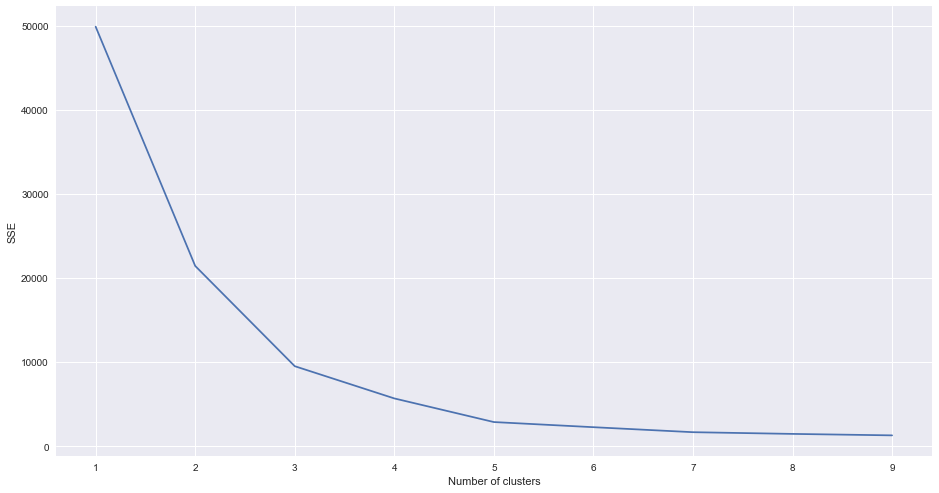

In [45]:

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()